In question 1.1, we consider the min variance portfolio with a target return m. *Note that the apostrophe symbol means transpose.* 

\begin{align*}
\underset{w}{\mathrm{argmin}} \quad \frac{1}{2} w' \Sigma w
\end{align*}

We are also given two constraints to this optimization problem. The first constraint is that the portfolio returns must be equal to a prespecified level m.

\begin{align*}
\mu_{\Pi} = w' \mu = m
\end{align*}

The second constraint is on the weights which is called the budget equation. This means that the sum of all the weights must be equal to 1.

\begin{align*}
w' \mathbf{1} = 1
\end{align*}

Given these conditions, we form the Lagrangian:

\
\begin{align*}
L(w, \lambda, \gamma) = \frac{1}{2} w' \Sigma w + \lambda (m - w' \mu) + \gamma (1 - w' \mathbf{1})
\end{align*}


To solve for the optimization problem, we take the partial derivatives of the Lagrangian formula:

\begin{align*}
\frac{\partial L}{\partial w} &= \Sigma w - \lambda \mu - \gamma \mathbf{1} = 0 \\
\frac{\partial L}{\partial \lambda} &= m - w' \mu = 0 \\
\frac{\partial L}{\partial \gamma} &= 1 - w' \mathbf{1} = 0
\end{align*}

Given our partial derivative of the Lagrangian formula with respect to w, we obtain the optimal allocation formula below:

\begin{align*} 
w^* = \Sigma^{-1} (\lambda \mu + \gamma \mathbf{1}) \end{align*}

Given the partial derivatives above, remember that the constraints are:
\begin{align*} 
\mu' w = m \\
\mathbf{1}' w = 1
\end{align*}

If we substitute W* into these two equations, we get:

\begin{align*} 
\mu' \Sigma^{-1} (\lambda \mu + \gamma \mathbf{1}) = \lambda \mu' \Sigma^{-1} \mu + \gamma \mu' \Sigma^{-1} \mathbf{1} = m \\
\mathbf{1}' \Sigma^{-1} (\lambda \mu + \gamma \mathbf{1}) = \lambda \mathbf{1}' \Sigma^{-1} \mu + \gamma \mathbf{1}' \Sigma^{-1} \mathbf{1} = 1 \\
\end{align*}

From Module 2 Lecture "Fundamentals of Optimization and Application to Portfolio Selection" slide 68, we define the following scalars:

\begin{align*} 
\left\{
\begin{array}{l}
A = \mathbf{1}' \Sigma^{-1} \mathbf{1} \\
B = \mu' \Sigma^{-1} \mathbf{1} = \mathbf{1}' \Sigma^{-1} \mu \\
C = \mu' \Sigma^{-1} \mu
\end{array}
\right. \\
\text{where: } AC - B^2 > 0.
\end{align*}

Substituting these scalars into the previous equations, we find:

\begin{array}{l}
C \lambda + B \gamma = m \\
B \lambda + A \gamma = 1
\end{array}

Resulting in:

\begin{array}{l}
\lambda = \frac{Am - B}{AC - B^2} \\
\gamma = \frac{C - Bm}{AC - B^2}
\end{array}

Now that we've detailed our equations, we can go forth with the calculations which can be found below in the Python code.


In [3]:
# Question 1.1

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=4)
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

    # Known Values

# Vector of Ones
one = np.array([1,1,1,1]).reshape(4,1)

# Vector of Returns
mu = np.array([0.02,0.07,0.15,0.20]).reshape(4,1)

# Standard Deviation Matrix
S = np.diag(np.array([0.05,0.12,0.17,0.25]))

# Correlation Matrix (the diagonal must always be 1)

R = np.array([1,0.3,0.3,0.3,0.3,1,0.6,0.6,0.3,0.6,1,0.6,0.3,0.6,0.6,1]).reshape(4,4)


# Return Constraint
m = 0.045

    # Formulas

# Return
Sigma = S@R@S

# Scalars
A = one.T@np.linalg.inv(Sigma)@one

B = mu.T@np.linalg.inv(Sigma)@one

C = mu.T@np.linalg.inv(Sigma)@mu

lamda = (A*m-B)/(A*C-B**2)
gamma = (C-B*m)/(A*C-B**2)

# Allocations w*
Weight_O = np.linalg.inv(Sigma) @ ((lamda * mu) + (gamma * one))

# Portfolio risk
Portfolio_Risk = (Weight_O.T@Sigma@Weight_O)**0.5

# Convert weights to percentages
Weight_O_percentage = Weight_O * 100

# Analytical Answer in Table Format
Answers = {
    'Optimal Allocations %': Weight_O_percentage.flatten(),
    'Portfolio Risk': np.repeat(Portfolio_Risk, 4)
}

Summary_Table_Q1p1 = pd.DataFrame(Answers)
Summary_Table_Q1p1.index = ['Asset A', 'Asset B', 'Asset C', 'Asset D']
display(Summary_Table_Q1p1)
# Table Explanation
table_description_q1p1 = """
For the assets A,B,C and D, we have the optimal allocations by percentage along with the portfolios overall risk. 
The optimal allocation is based upon a return of 4.5% which was specified in the question itself. 
Our allocations represent the weightings of our assets to hit our target return while trying to minimize our risk. 
When evaluating our portfolio's risk, it's based on the standard deviation of the portfolios return. 
The reason our risk value repeats is it represents the risk of the entire portfolio, not of a single asset.
"""
display(Markdown(table_description_q1p1))

,Optimal Allocations %,Portfolio Risk
Asset A,78.511066,0.058401
Asset B,5.386419,0.058401
Asset C,13.355472,0.058401
Asset D,2.747042,0.058401



For the assets A,B,C and D, we have the optimal allocations by percentage along with the portfolios overall risk. 
The optimal allocation is based upon a return of 4.5% which was specified in the question itself. 
Our allocations represent the weightings of our assets to hit our target return while trying to minimize our risk. 
When evaluating our portfolio's risk, it's based on the standard deviation of the portfolios return. 
The reason our risk value repeats is it represents the risk of the entire portfolio, not of a single asset.


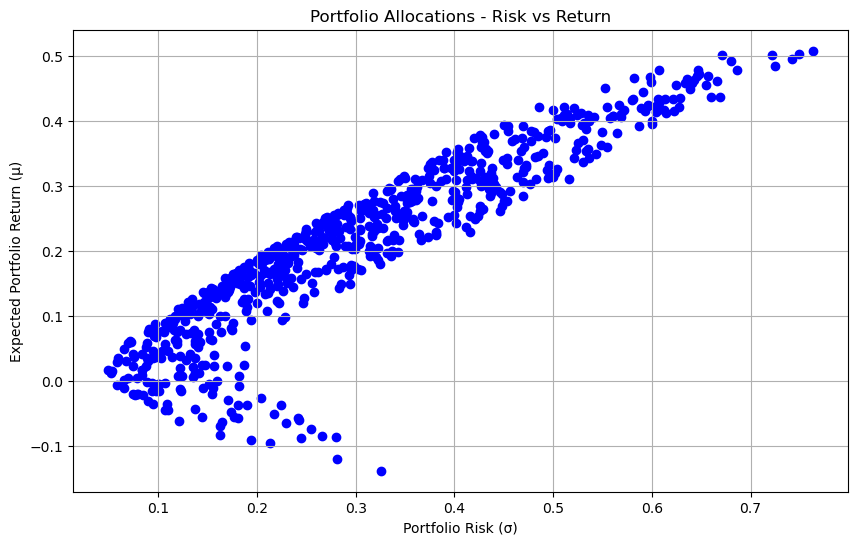


The shape of the curve is the opportunity set. 
Given the 700 simulated portfolios, our curve is all combinations of risk and return for various portfolio weights. 
The upper edge of our curve forms the efficient frontier. These values represent the 
highest return given a certain level of risk. 
As our weightings are randomly generated and are not optimized as noted from question 1.2, 
our points are scattered where our optimal portfolios are found on the upper boundary.


In [4]:
# Question 1.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Vector of Returns from question 1.1
mu = np.array([0.02,0.07,0.15,0.20]).reshape(4,1)

# Standard Deviation Matrix from question 1.1
S = np.diag(np.array([0.05,0.12,0.17,0.25]))

# Correlation Matrix from question 1.1
R = np.array([1,0.3,0.3,0.3,0.3,1,0.6,0.6,0.3,0.6,1,0.6,0.3,0.6,0.6,1]).reshape(4,4)

# Covariance Matrix
Sigma = S@R@S

# For simulating portfolios, we can reference python lab 'Portfolio Optimisation' by Kannan Singaravelu

# Generating 700 random allocation sets
numofportfolio = 700
allocations = np.zeros((numofportfolio, 4))

for i in range(numofportfolio):
    # Generate three random weights for the first three assets that are between the values -1 and 1
    # Note that the question specifies 'Weights will not be optimal and can be negative'
    random_weights = np.random.uniform(-1, 1, 3)
    # Solve for the fourth weight where we respect the budget contraint as specified in the question
    w4 = 1 - random_weights.sum()
    allocations[i, :] = np.append(random_weights, w4)

# Calculate portfolio returns and risks for each allocation set
portfolio_returns = allocations@mu
portfolio_risks = (np.sum(allocations@Sigma * allocations, axis=1))**0.5

# Plotting
plt.figure(figsize=(10,6))
plt.scatter(portfolio_risks, portfolio_returns, c='blue', marker='o')
plt.title('Portfolio Allocations - Risk vs Return')
plt.xlabel('Portfolio Risk (σ)')
plt.ylabel('Expected Portfolio Return (μ)')
plt.grid(True)
plt.show()

# Curve Explanation
shape_description_q1p2 = """
The shape of the curve is the opportunity set. 
Given the 700 simulated portfolios, our curve is all combinations of risk and return for various portfolio weights. 
The upper edge of our curve forms the efficient frontier. These values represent the 
highest return given a certain level of risk. 
As our weightings are randomly generated and are not optimized as noted from question 1.2, 
our points are scattered where our optimal portfolios are found on the upper boundary.
"""

display(Markdown(shape_description_q1p2))


In [5]:
# Question 2

import pandas as pd
import numpy as np
from scipy.stats import norm
from IPython.display import display, Markdown

# Weights

w = np.array([0.5,0.2,0.3]).reshape(3,1)

# Vector of Returns

mu = np.array([0,0,0]).reshape(3,1)

# Standard Deviation Matrix

S = np.diag(np.array([0.30,0.20,0.15]))

# Correlation Matrix

R = np.array([1,0.8,0.5,0.8,1,0.3,0.5,0.3,1]).reshape(3,3)

# Return

Sigma = S@R@S

# Confidence

c = 0.99

# Inverse CDF

Factor = norm.ppf(1-c)

# CDF at Inverse CDF

phi = norm.cdf(Factor)

# Partial VaR

VaR_P = mu + Factor * ((Sigma @ w)/((w.T@Sigma@w)**0.5))

# Partial ES

ES_P = mu - (phi/(1-c)) * ((Sigma @ w)/((w.T@Sigma@w)**0.5))

# Analytical Answer in Table Format
Answers = {
    'VaR Sensitivity': VaR_P.flatten(),
    'ES Sensitivity': ES_P.flatten()
}

Summary_Table_Q2 = pd.DataFrame(Answers)
Summary_Table_Q2.index = ['Asset 1', 'Asset 2', 'Asset 3']
display(Summary_Table_Q2)
# Table Explanation
table_description_q2 = """
The table shows the Value at Risk (VaR) sensitivity and Expected Shortfall (ES) 
sensitivity for the three assets (1,2, and 3). 
The sensitivities for VaR and ES are over a confidence level of 99%.
For VaR sensitivity, the valuations in the table tell us given 99% confidence, if we were to 
increase the weight of asset 1, VaR of our portfolio would decrease by 68% by the change in our weight. 
In other words, we are looking at the change of VaR per unit change in asset weighting.
When seeing ES sensitivity for asset one, per unit change in the asset weight, we see the ES change 
in average expected loss.
We can derive these sensitivities given zero returns, volatilities and a correlation matrix which was 
defined in the question itself.
"""

display(Markdown(table_description_q2))

,VaR Sensitivity,ES Sensitivity
Asset 1,-0.683865,-0.293965
Asset 2,-0.386799,-0.166269
Asset 3,-0.220709,-0.094874



The table shows the Value at Risk (VaR) sensitivity and Expected Shortfall (ES) 
sensitivity for the three assets (1,2, and 3). 
The sensitivities for VaR and ES are over a confidence level of 99%.
For VaR sensitivity, the valuations in the table tell us given 99% confidence, if we were to 
increase the weight of asset 1, VaR of our portfolio would decrease by 68% by the change in our weight. 
In other words, we are looking at the change of VaR per unit change in asset weighting.
When seeing ES sensitivity for asset one, per unit change in the asset weight, we see the ES change 
in average expected loss.
We can derive these sensitivities given zero returns, volatilities and a correlation matrix which was 
defined in the question itself.


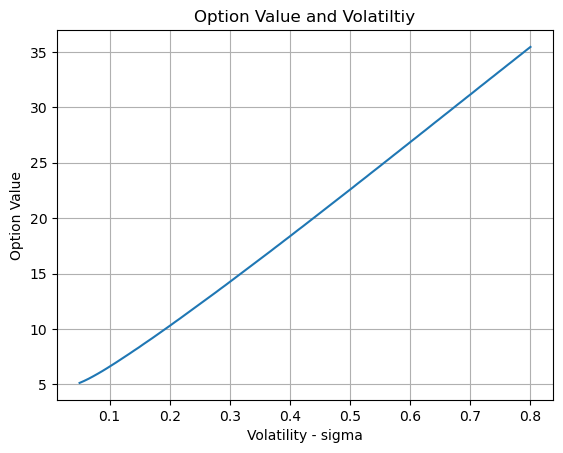


The graph depicted shows the relationship between sigma (The volatility) of our asset and the 
European call option value. 
As volatility increases, we see that the options value increases. 
The reason behind this is as you have a higher volatility, that increases the chances for your 
asset (spot price) to move above the strike.
Given this would increase the chances for the option to end in the money, the value of the 
option would be higher.
This shows the connection between the assets uncertainty (which we can define as volatility) 
and the premium an investor is willing to pay for that option. 


In [6]:
# Question 3 plot 1

import numpy as np
from IPython.display import display, Markdown

# Used binomial structure from Python Lab 'Binomial Trees in Option Pricing' by Kannan Singaravelu

def binomial_option(spot: float, strike: float, rate: float, sigma: float, time: float, steps: int, output: int=0):
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for European call option payoff.
    
    Params
    ------
    spot: int or float - spot price
    strike: int or float - strike price
    rate: float - interest rate
    sigma: float - volatility
    time: int or float - expiration time
    steps: int - number of steps in the binomial tree
    output: int - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value, and delta specified by the output parameter.
    """
    # Parameters calculation
    ts = time / steps
    u = 1 + sigma * np.sqrt(ts)
    v = 1 - sigma * np.sqrt(ts)
    p = 0.5 + rate * np.sqrt(ts) / (2 * sigma)
    df = 1 / (1 + rate * ts)

    # Initialize arrays
    px = np.zeros((steps + 1, steps + 1))
    cp = np.zeros((steps + 1, steps + 1))
    V = np.zeros((steps + 1, steps + 1))
    d = np.zeros((steps + 1, steps + 1))

    # Forward loop 
    for j in range(steps + 1):
        for i in range(j + 1):
            px[i,j] = spot * np.power(v,i) * np.power(u,j-i)
            cp[i,j] = np.maximum(px[i,j] - strike, 0)

    # Reverse loop 
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)
    return results[output]

#########

volatility = np.linspace(0.05, 0.8, 100)
option_val = []
for sigma in volatility:
    option_val.append(binomial_option(100,100,0.05, sigma,1,4,2)[0,0] )
    
plt.plot(volatility, option_val)
plt.xlabel('Volatility - sigma')
plt.ylabel('Option Value')
plt.title('Option Value and Volatiltiy')
plt.grid(True)
plt.show()
# Curve Explanation
shape_description_q3p1 = """
The graph depicted shows the relationship between sigma (The volatility) of our asset and the 
European call option value. 
As volatility increases, we see that the options value increases. 
The reason behind this is as you have a higher volatility, that increases the chances for your 
asset (spot price) to move above the strike.
Given this would increase the chances for the option to end in the money, the value of the 
option would be higher.
This shows the connection between the assets uncertainty (which we can define as volatility) 
and the premium an investor is willing to pay for that option. 
"""
display(Markdown(shape_description_q3p1))

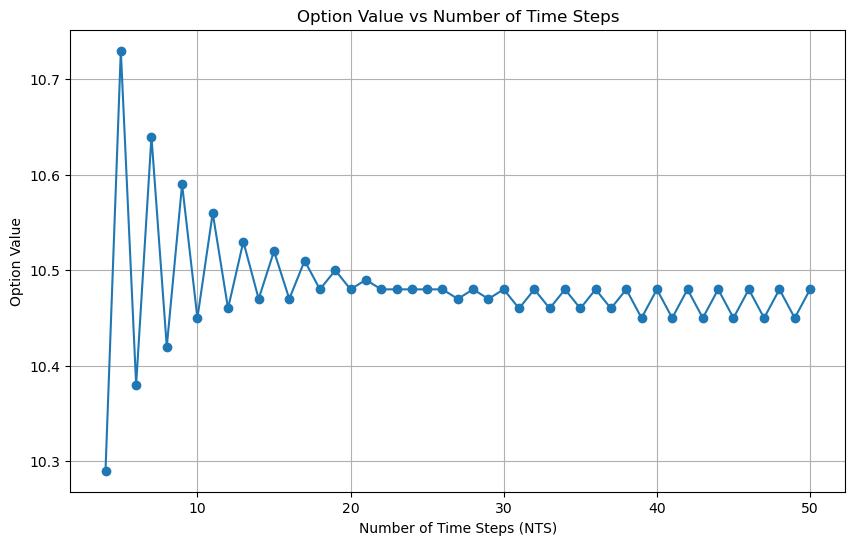


Our graph shows the relationship between the number of time steps increasing and the European call option value. 
As we can see, as the number of steps increase, the option value converges to a certain level. 
This aspect of the graph shows the binomial model's accuracy for valuing options when approaching the 
continuous time limit. 

In [7]:
# Question 3 plot 2
# Used binomial structure from Python Lab 'Binomial Trees in Option Pricing' by Kannan Singaravelu 
# with code modifications

import numpy as np
from IPython.display import display, Markdown

def binomial_option(spot: float, strike: float, rate: float, sigma: float, time: float, steps: int, output: int=0):
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for European call option payoff.
    
    Params
    ------
    spot: int or float - spot price
    strike: int or float - strike price
    rate: float - interest rate
    sigma: float - volatility
    time: int or float - expiration time
    steps: int - number of steps in the binomial tree
    output: int - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value, and delta specified by the output parameter.
    """
    # Parameters calculation
    ts = time / steps
    u = 1 + sigma * np.sqrt(ts)
    v = 1 - sigma * np.sqrt(ts)
    p = 0.5 + rate * np.sqrt(ts) / (2 * sigma)
    df = 1 / (1 + rate * ts)

    # Initialize arrays
    px = np.zeros((steps + 1, steps + 1))
    cp = np.zeros((steps + 1, steps + 1))
    V = np.zeros((steps + 1, steps + 1))
    d = np.zeros((steps + 1, steps + 1))

    # Forward loop 
    for j in range(steps + 1):
        for i in range(j + 1):
            px[i,j] = spot * np.power(v,i) * np.power(u,j-i)
            cp[i,j] = np.maximum(px[i,j] - strike, 0)

    # Reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)
    return results[output]

######

# Set volatility to 0.2
sigma = 0.2  
# NTS from 4 to 50 in steps of 1
NTS = np.arange(4, 51, 1)  
option_values = []

# Calculate the option price for each number of steps
for steps in NTS:
    option_price = binomial_option(100, 100, 0.05, sigma, 1, int(steps), 2)[0, 0]
    option_values.append(option_price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(NTS, option_values, '-o')
plt.title('Option Value vs Number of Time Steps')
plt.xlabel('Number of Time Steps (NTS)')
plt.ylabel('Option Value')
plt.grid(True)
plt.show()
# Curve Explanation
shape_description_q3p2 = """
Our graph shows the relationship between the number of time steps increasing and the European call option value. 
As we can see, as the number of steps increase, the option value converges to a certain level. 
This aspect of the graph shows the binomial model's accuracy for valuing options when approaching the 
continuous time limit. """
display(Markdown(shape_description_q3p2))

Question 4.1

1. As the probability of $ X $ being less than $ \text{VaR}_c(X) $ is $ c $, we can define c as our level.

2. For our variable c used in Expected Shortfall $ \text{ES}_c(X) $, we can define c as the value of $ X $ given that $ X $ is less than $ \text{VaR}_c(X) $. *We are given this equation in Question 4.1. Further, we can refer to 'Value at Risk & Expected Shortfall notes: Slide 36 by Stuart Jackaman*:
   $$ \text{ES}_c(X) = \mathbb{E}[X | X \leq \text{VaR}_c(X)] $$

3. By definition, for a continuous random variable $ X $ with probability density function $ f(x) $, the cumulative distribution function $ F(x) $ is:
   $$ F(x) = \int_{-\infty}^{x} f(u) \, du $$

4. As we are interested in the lower tail of our distribution, we can considering the integral from $ -\infty $ to $ \text{VaR}_c(X) $. When conditioning, we need to ensure that the value is less than or equal to VaR. Adjusting for the probability of being in this range which we can define as $ c $, we can say the expected value is an integral over the quantile function $ F^{-1}(u) $, which is the inverse of the CDF:
   $$ \text{ES}_c(X) = \frac{1}{c} \int_{0}^{c} F^{-1}(u) \, du $$

5. For our integral of the function from 0 to $ c $, it evaluates the area under the curve for the lower $ c $ percent of the distribution. This is the same as taking the average of the worst $ c $ percentage of outcomes. Using the definition of the quantile function $ F^{-1}(u) $ gives the value of $ X $ such that $ P(X \leq F^{-1}(u)) = u $, and is equivalent to $ \text{VaR}_u(X) $. *Resource used: 'Value at Risk & Expected Shortfall additional notes by Stuart Jackaman*

6. Given the quantile function stated in 5., we can substitute $ F^{-1}(u) $ with $ \text{VaR}_u(X) $ to get the integral form of ES as:
   $$ \text{ES}_c(X) = \frac{1}{c} \int_{0}^{c} \text{VaR}_u(X) \, du $$

7. By averaging VaR over the interval $ [0,c] $, we get ES in the form:
   $$ \text{ES}_c(X) = \frac{1}{1-c} \int_{0}^{1-c} \text{VaR}_u(X) \, du $$

Some of the assumptions that must be made is that the distribution of $ X $ is continuous as well as $ \text{VaR}_u(X) $ is a continuous and increasing function of $ u $ within the interval $ [0,c] $.

8. Given the property of integrals related to the translation invariance, we can add c to our limits without changing the functions value. *Resource used: 'Value at Risk & Expected Shortfall' notes: Slide 36 by Stuart Jackaman*:

$$\text{ES}_c(X) = \frac{1}{1 - c} \int_{c}^{1} \text{VaR}_u(X) du$$

9. Some of the properties of VaR is to have a normal variable $X$ with mean $\mu$ and standard deviation $\sigma$ at level $u$. Given this information, we create the formula $\text{VaR}_u(X) = \mu + \sigma\Phi^{-1}(1-u)$. Substituting our defined VaR formula into the above equation defined in 8., we get: *Note: The VaR equation is also given in problem 4.1*:

$$\text{ES}_c(X) = \frac{1}{1 - c} \int_{c}^{1} (\mu + \sigma\Phi^{-1}(1-u)) du$$

10. When we expand the integral, we can separate the constant $\mu$ and the variable giving us the relation:

$$\text{ES}_c(X) = \mu + \frac{1}{1 - c} \int_{c}^{1} \sigma\Phi^{-1}(1-u) du$$

11. In order to solve for the integral, we change the variables by letting $u = \Phi(z)$. Taking the derivative of $u$, we get $du = \phi(z)dz$ where $\phi(z)$ is the standard normal pdf and $z$ is a standard normal variable. This leads to:

$$\text{ES}_c(X) = \mu + \frac{\sigma}{1 - c} \int_{\Phi^{-1}(c)}^{\infty} z \phi(z) dz$$

12. The integral is using standard normal variables and the limits of our integral altered to $\Phi^{-1}(c)$ and $\infty$. Because $\phi(z)$ is the pdf of the standard normal distribution as well as $z\phi(z)$ has a mean about 0, we use this information to derive the identity $\int z \phi(z) dz = -\phi(z)$. This identity makes the integral:

$$\text{ES}_c(X) = \mu - \frac{\sigma}{1 - c} [\phi(z)]_{\Phi^{-1}(c)}^{\infty}$$

13. Evaluating our formula above for our limits, we have $\phi(\infty) = 0$ and $\phi(\Phi^{-1}(c)) = \phi(c)$. Some of the logic is that $\phi(z)$ about zero is symmetric. Now we can put $\phi(\Phi^{-1}(c))$ back into the equation which gives us our final answer for Expected Shortfall:

$$\text{ES}_c(X) = \mu - \frac{\sigma \phi(\Phi^{-1}(c))}{1 - c}$$

With the assumption that our returns are on a normal distribution, ES shows the expected loss in the worst $1-c$ cases of our this distribution.

Resources used: 
[1] 'PDEs & Transition Density Functions' by Dr. Riaz Ahmad: Lecture Notes & recorded lecture
[2] 'Value at Risk & Expected Shortfall' by Stuart Jackaman: Lecture Notes
[3] 'Value at Risk & Expected Shortfall' Additional Notes: 'Explorations in Asset Returns' by Richard Diamond
[4] 'Value at Risk & Expected Shortfall' Additional Notes: 'A Practical Guide to Risk Management' by Thomas S. Coleman

In [12]:
# Question 4.2

import pandas as pd
import numpy as np
from scipy.stats import norm
from IPython.display import display, Markdown

Percentile_Range = np.array([0.9995,0.9975,0.9950,0.9925,0.9900,0.9850,0.9800,0.9750])

# Given we're using a normal distribution, we can assume mu = 0 and sigma = 1

mu = 0

sigma = 1

Factor = norm.ppf(1-Percentile_Range)

phi = norm.pdf(Factor)

ES = mu - sigma * (phi/(1-Percentile_Range))

# Analytical Answer in Table Format
Answers_Q4p2 = {
    'Percentile': (Percentile_Range *100).flatten(), # Convert for percentage on our table
    'Expected Shortfall': ES.flatten()
}

Summary_Table_Q4p2 = pd.DataFrame(Answers_Q4p2)
display(Summary_Table_Q4p2)
# Table Explanation
table_description_q4p2 = """
The table shows the Expected Shortfall (ES) and it's various percentile levels for the portfolio. 
In the calculations, we assume a normal distribution where the mean (mu) is 0 and 
the standard deviation (sigma) is equal to one. 
Let’s look at one of our table values as an example, 99.95 percentile with an expected shortfall (ES) of -3.55. 
This means that for the tail end 0.05%, our loss on average would be 3.55 standard deviations 
below our mean (as we look at the left tail end for negative values).
As ES is displayed across different percentiles, we're able to gather information on the tail 
risk of the portfolio to see what loss would look like given extreme cases.
"""

display(Markdown(table_description_q4p2))

,Percentile,Expected Shortfall
0,99.95,-3.554381
1,99.75,-3.104357
2,99.50,-2.891949
3,99.25,-2.761240
4,99.00,-2.665214
5,98.50,-2.524695
6,98.00,-2.420907
7,97.50,-2.337803



The table shows the Expected Shortfall (ES) and it's various percentile levels for the portfolio. 
In the calculations, we assume a normal distribution where the mean (mu) is 0 and 
the standard deviation (sigma) is equal to one. 
Let’s look at one of our table values as an example, 99.95 percentile with an expected shortfall (ES) of -3.55. 
This means that for the tail end 0.05%, our loss on average would be 3.55 standard deviations 
below our mean (as we look at the left tail end for negative values).
As ES is displayed across different percentiles, we're able to gather information on the tail 
risk of the portfolio to see what loss would look like given extreme cases.


In [14]:
# Question 5 part a

# For this question, I used Tutorial 'Statistical Essentials for VaR & ES' python file 
# "Backtesting for Analytical VaR. Cornish-Fisher VaR"
# This file was provided in the live tutorial class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from scipy.optimize import fsolve
from IPython.display import display, Markdown

# Parameters

rolling_window = 21

c = 0.99
inverse_cdf = norm.ppf(1-c)

factor = inverse_cdf

# Locally stored Data
data = pd.read_csv(r"C:\Users\natha\OneDrive\Desktop\CQF Exam 1\Jan 24 Exam 1 Data.csv", 
                   parse_dates=True, index_col='Date')
data.index = pd.to_datetime(data.index)

# Log Returns

data['LogReturn'] = np.log(data['SP500']) - np.log(data['SP500'].shift(1))

# Standard deviation on a rolling basis
data['STD'] = data['LogReturn'].rolling(rolling_window, min_periods=rolling_window).std()

# 10D/99% VaR
data['VAR10D'] = factor * (data['STD']) * np.sqrt(10)

# Shift(-10) brings up the future price (index level), which will realise in 10 days
data['Ret10D'] = np.log(data['SP500'].shift(-10) / data['SP500'])

data['Breach'] = data['Ret10D'] < data['VAR10D']

# Filter for the eligible number of comparisons
data_eligible = data[pd.notnull(data['Ret10D']) & pd.notnull(data['VAR10D'])]

# Filter for breaches
data_breach = data[data['Breach'] == True]


N_breaches = data_breach.count()['Breach']
N_obs = data_eligible.count()['VAR10D']
Breaches = N_breaches/N_obs * 100

# a) Count and percentage of VaR breaches

Answers_Q5p1 = {
    '# of Observations': [N_obs],
    '# of Breaches': [N_breaches],
    '% of Breaches': [Breaches]
}

Summary_Table_Q5p1 = pd.DataFrame(Answers_Q5p1)
print(Summary_Table_Q5p1.to_string(index=False))
# Table Explanation
table_description_q5pa = """
To ensure the accuracy of our VaR model, we look at how frequently the actual returns fell below the 
VaR threshold given the rolling window period. 
For each time this occurred, we designated this as a 'Breach' where out of the total 1219 observations, 
actual returns fell below VaR 25 times. 
When showing the percentage of these breaches, we demonstrate the quality of our model and see potential 
over or underestimations of risk.
"""

display(Markdown(table_description_q5pa))

 # of Observations  # of Breaches  % of Breaches
              1219             25       2.050861



To ensure the accuracy of our VaR model, we look at how frequently the actual returns fell below the 
VaR threshold given the rolling window period. 
For each time this occurred, we designated this as a 'Breach' where out of the total 1219 observations, 
actual returns fell below VaR 25 times. 
When showing the percentage of these breaches, we demonstrate the quality of our model and see potential 
over or underestimations of risk.


In [10]:
# Question 5 part b
# For this question, I used Tutorial 'Statistical Essentials for VaR & ES' python file 
# "Backtesting for Analytical VaR. Cornish-Fisher VaR"
# This file was provided in the live tutorial class

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm
from scipy.optimize import fsolve
from IPython.display import display, Markdown

# Parameters

rolling_window = 21

c = 0.99
inverse_cdf = norm.ppf(1-c)

factor = inverse_cdf

# Locally stored Data
data = pd.read_csv(r"C:\Users\natha\OneDrive\Desktop\CQF Exam 1\Jan 24 Exam 1 Data.csv", 
                   parse_dates=True, index_col='Date')
data.index = pd.to_datetime(data.index)

# Log Returns

data['LogReturn'] = np.log(data['SP500']) - np.log(data['SP500'].shift(1))

# Standard deviation on a rolling basis
data['STD'] = data['LogReturn'].rolling(rolling_window, min_periods=rolling_window).std()

# 10D/99% VaR
data['VAR10D'] = factor * (data['STD']) * np.sqrt(10)

# Shift(-10) brings up the future price (index level), which will realise in 10 days
data['Ret10D'] = np.log(data['SP500'].shift(-10) / data['SP500'])

data['Breach'] = data['Ret10D'] < data['VAR10D']

# Filter for the eligible number of comparisons
data_eligible = data[pd.notnull(data['Ret10D']) & pd.notnull(data['VAR10D'])]

# Filter for breaches
data_breach = data[data['Breach'] == True]


N_breaches = data_breach.count()['Breach']
N_obs = data_eligible.count()['VAR10D']
Breaches = N_breaches/N_obs * 100

# Identify consecutive breaches

data['Consecutive'] = data['Breach'] & data['Breach'].shift(1)

consecutive_breaches = 0
consecutive_breach_count = 0

for i in range(1, len(data)):
    if data['Breach'][i] and data['Breach'][i-1]:
        consecutive_breaches += 1
        if data['Consecutive'][i] and not data['Consecutive'][i-1]:
            consecutive_breach_count += 1
    else:
        consecutive_breaches = 0

# percentage of consecutive breaches
percentage_consecutive = (consecutive_breach_count / N_breaches) * 100 if N_breaches else 0


# Count and percentage of consecutive VaR breaches
Answers_Q5p2 = {
    '# of Observations': [N_obs],
    '# of Consec Breaches': [consecutive_breach_count],
    '% of Consec Breaches': [percentage_consecutive]
}

Summary_Table_Q5p2 = pd.DataFrame(Answers_Q5p2)
print(Summary_Table_Q5p2.to_string(index=False))
# Table Explanation
table_description_q5pb = """
In this table, we see the number of consecutive breaches and percentage of 
those consecutive breaches. 
By understanding how often clusters of breaches occur, we're able to recognize potential 
serial correlation in underestimating risk. 
The analytics of viewing our consecutive breaches demonstrates the models reliability.
"""

display(Markdown(table_description_q5pb))

 # of Observations  # of Consec Breaches  % of Consec Breaches
              1219                     7                  28.0



In this table, we see the number of consecutive breaches and percentage of 
those consecutive breaches. 
By understanding how often clusters of breaches occur, we're able to recognize potential 
serial correlation in underestimating risk. 
The analytics of viewing our consecutive breaches demonstrates the models reliability.



The graph shows backtesting for 10D99% VaR versus the actual 10D forward returns. 
The importance of the illustration is we can see the moment when a breach occurs. 
The lines shows predicted VaR and the actual returns, while our 'X' symbols 
designate when actual returns fell below VaR. 
The visual graph helps the analysis of our VaR models accuracy to estimate potential loss.


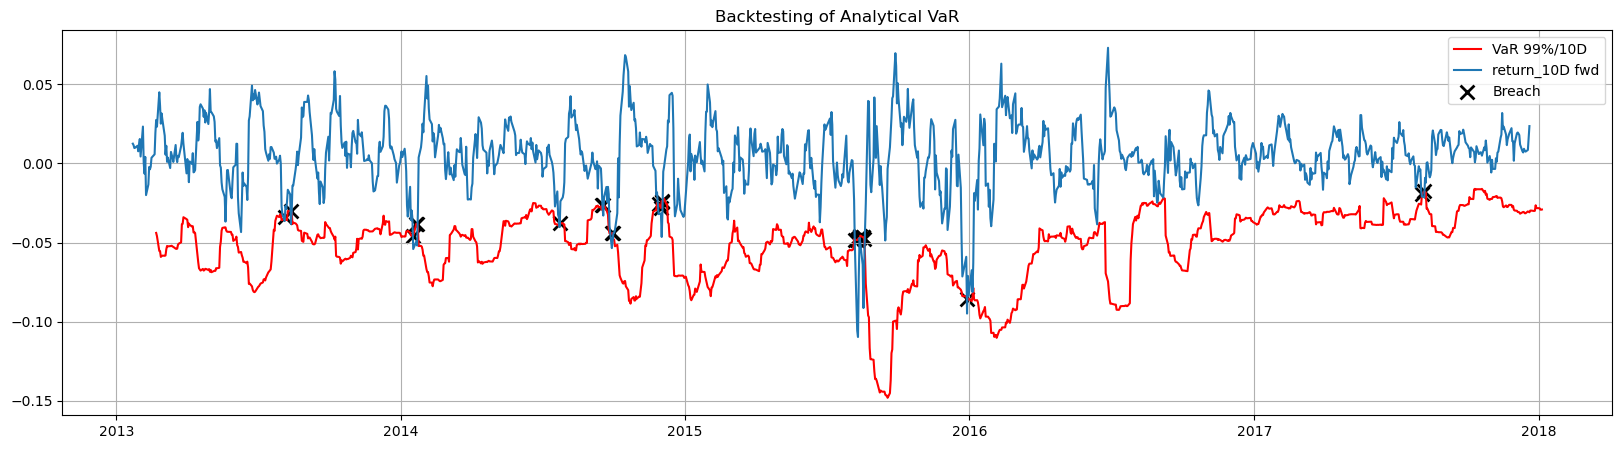

In [17]:
# Question 5 part C
# For this question, I used Tutorial 'Statistical Essentials for VaR & ES' python file 
# "Backtesting for Analytical VaR. Cornish-Fisher VaR"
# This file was provided in the live tutorial class

plt.title('Backtesting of Analytical VaR');
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

varPlt, = plt.plot(data.index, data['VAR10D'], color='RED');
r10dplt, = plt.plot(data.index, data['Ret10D']);

varBreachPlt = plt.scatter(data_breach.index, data_breach['VAR10D'], color='BLACK', 
                           s=100, linewidths=2, marker='x');

plt.legend(["VaR 99%/10D","return_10D fwd","Breach"]);
plt.grid();
# graph Explanation
graph_description_q5pc = """
The graph shows backtesting for 10D99% VaR versus the actual 10D forward returns. 
The importance of the illustration is we can see the moment when a breach occurs. 
The lines shows predicted VaR and the actual returns, while our 'X' symbols 
designate when actual returns fell below VaR. 
The visual graph helps the analysis of our VaR models accuracy to estimate potential loss.
"""

display(Markdown(graph_description_q5pc))